# What is this?

Basically the idea is that the connection probability should be

p_uv = e min(1, c(wu wv/W / r_uv^d)^alpha)

So now there's 2 constants: e, c

We try to estimate e by seeing that the top 10 or so degree nodes of the GIRG probably should all connect to each other. I.e. a full clique. But in fact they might not. Maybe because of e??

In [1]:
import os
os.chdir('/cluster/home/bdayan/girgs/benji_src/notebooks/')

import sys
sys.path.append('../')
sys.path.append('../../nemo-eva/src/')

import os
os.getcwd()


'/cluster/home/bdayan/girgs/benji_src/notebooks'

In [2]:
from benji_girgs import utils, generation, points, fitting
import os
import glob
import pandas as pd
import networkit

import networkit as nk

from girg_sampling import girgs

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import numpy as np
import matplotlib.pyplot as plt

import networkx as nx

import do_feature_extract


/cluster/scratch/bdayan/GIRG_data/socfb-Caltech36.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Reed98.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Simmons81.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Swarthmore42.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Amherst41.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Bowdoin47.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Hamilton46.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Trinity100.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-USFCA72.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Williams40.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Oberlin44.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Wellesley22.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Smith60.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Vassar85.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Middlebury45.SpaceOne
/cluster/scratch/bdayan/GIRG_data/socfb-Pepperdine8

In [3]:
tau = 2.1
n = 2500
maxes = []
sums = []
for _ in range(20):
    ws = generation.powerlaw_dist(tau, n=n)
    maxes.append(np.max(ws))
    sums.append(np.sum(ws))

In [4]:
maxes

[3758.9229290498392,
 3985.775496414103,
 7541.3994356716685,
 22290.01099330204,
 17969.64567797938,
 1574.4794223110064,
 2293.6761027725875,
 22446.20100510466,
 47888.1400382922,
 8005.189995311369,
 6774.932081818262,
 2385.1560310765462,
 6277.740779347841,
 3373.678754795584,
 6429.571637058569,
 82487.08713894073,
 7574.575903732994,
 5570.178431846531,
 10695.728191423668,
 21843.902638247382]

In [5]:
n**(1/tau)

80.30857221391513

In [11]:
ws

array([3.80037904, 1.59982612, 8.57281111, ..., 1.43639066, 1.10180733,
       1.23739241])

In [12]:
ws

array([3.80037904, 1.59982612, 8.57281111, ..., 1.43639066, 1.10180733,
       1.23739241])

(array([9.935e+03, 3.800e+01, 6.000e+00, 6.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([1.00010892e+00, 9.45372294e+01, 1.88074350e+02, 2.81611470e+02,
        3.75148591e+02, 4.68685711e+02, 5.62222832e+02, 6.55759953e+02,
        7.49297073e+02, 8.42834194e+02, 9.36371314e+02, 1.02990843e+03,
        1.12344556e+03, 1.21698268e+03, 1.31051980e+03, 1.40405692e+03,
        1.49759404e+03, 1.59113116e+03, 1.68466828e+03, 1.77820540e+03,
        1.871742

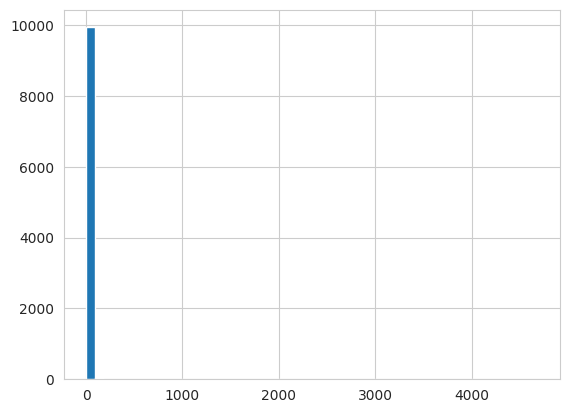

In [17]:
plt.hist(ws, bins=50)

In [39]:
np.max(ws)

108394.40887147917

In [29]:
((tau - 1)/(tau - 2)) * n**( + 2/tau)

70944.13448141377

In [22]:
2/tau

0.9523809523809523

In [23]:
n**((2-tau)/tau)

0.6449466771037621

In [25]:
(2-tau)/tau

-0.04761904761904766

(array([4., 7., 2., 0., 2., 3., 0., 0., 1., 1.]),
 array([  993.10937714,  3395.1869299 ,  5797.26448266,  8199.34203542,
        10601.41958818, 13003.49714094, 15405.5746937 , 17807.65224645,
        20209.72979921, 22611.80735197, 25013.88490473]),
 <BarContainer object of 10 artists>)

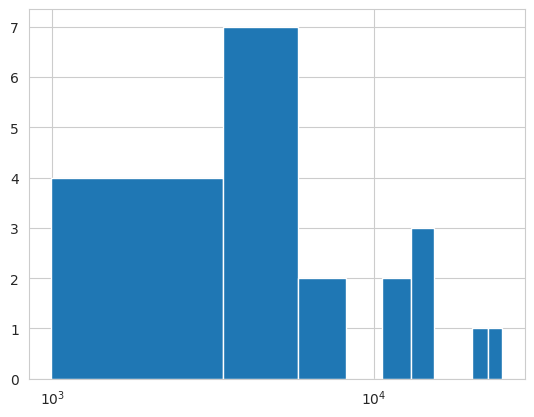

In [33]:
plt.xscale('log')
plt.hist(maxes)

In [34]:
n**(1/tau)

80.30857221391513

In [40]:
ws2 = ws[ws < 108390]
np.max(ws2)

4506.539696916535

In [42]:
def f(k, n, tau):
    return ((tau-1)/(tau-2)) * (k/n)**(-1 + (2-tau)*(-1/tau))

f(1, n, tau)

70944.13448141376

In [44]:
f(3, n, tau)

24918.12153474709

In [46]:
np.sum(ws)

175801.4138812999

(array([5., 9., 3., 1., 1., 0., 0., 0., 0., 1.]),
 array([ 55953.14704893,  68787.72439082,  81622.3017327 ,  94456.87907458,
        107291.45641646, 120126.03375834, 132960.61110023, 145795.18844211,
        158629.76578399, 171464.34312587, 184298.92046776]),
 <BarContainer object of 10 artists>)

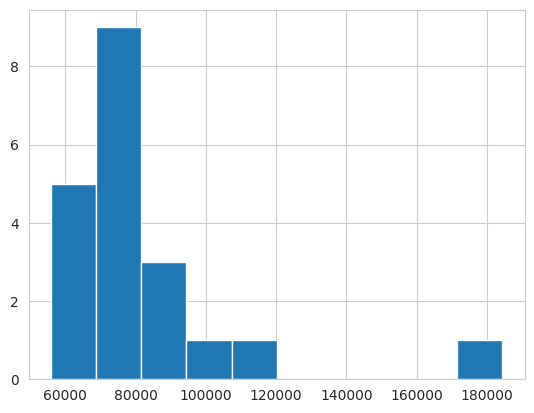

In [49]:
plt.hist(sums)

In [52]:
f(10, n, tau)**2 / 100000

626.716436186975

In [54]:
sorted(ws)[-10:]

[796.6933702004009,
 901.1999180405858,
 1106.2811705333895,
 1156.0407685950786,
 1285.7471988737643,
 3508.048177415622,
 3611.621296427049,
 7659.028052819373,
 15685.245737874517,
 92206.33485634011]

In [56]:
796*901/100000

7.17196

In [57]:
n**(1/tau)

80.30857221391513

In [58]:
np.mean(ws)

18.4298920467755

In [59]:
(tau-1)/(tau-2)

10.999999999999991

In [62]:
k = 10
n**(1/(tau-1)) * k**(-1/(tau-1))

533.6699231206309

In [63]:
((tau-1)/(tau-2)) **((tau-1)/(-2)) * n**((tau-3)/(-2))

16.87462083299284

In [7]:
def max_k(n, tau):
    """
    The smallest of the top k weights is about (k/n)^(1/(1-tau)) = w_k
    hence we solve for w_k^2/W = 1
    where W = n<w> = n(tau-1)/(tau-2)
    Essentially we get const * n^[(3-tau)/2]
    We therefore theorise that probably k = n^[(3-tau)/3] is fine?
    """
    return ((tau-1)/(tau-2)) **((tau-1)/(-2)) * n**((tau-3)/(-2))


def max_k(n, tau):
    return n**((3-tau)/3)

In [ ]:
n**((3-tau)/3)

In [186]:
import importlib
importlib.reload(generation)

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

In [190]:
n = 2500
d=2
tau=2.1
alpha=1.2
desiredAvgDegree=10.0
e=1.0
k = 10

top_k_edges = []

for _ in range(10):
    print(_)
    g, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, desiredAvgDegree=desiredAvgDegree, points_type=points.PointsTorus2, e=e)

    g2 = utils.get_top_k_clique(g, k)
    top_k_edges.append(g2.numberOfEdges())

0
1
2
3
4
5
6
7
8
9


In [191]:
top_k_edges

[45, 43, 45, 45, 45, 45, 45, 45, 45, 45]

In [58]:
g2 = utils.get_top_k_clique(g, 10)
nk.overview(g2)

Network Properties:
nodes, edges			10, 45
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				1.000000
clustering coefficient		1.000000
min/max/avg degree		9, 9, 9.000000
degree assortativity		nan
number of connected components	1
size of largest component	10 (100.00 %)


In [52]:
utils.LCC(g)

0.5415555728578408

In [33]:
import importlib
importlib.reload(generation)

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

In [34]:
num_missing, num_triangles = generation.e_statistic(g, 0.05)
num_missing, num_triangles
L = num_triangles/num_missing
f = 0.4
h = 0.3
A = f + h*(1-f)
B = f + h*h*(1-f)
C = (2*A*L) / (B + 2*B*L)

L
A, B, C

(0, 30.0)

ZeroDivisionError: float division by zero

In [35]:
f

0.4

In [36]:
out_list, probs = generation.characterise_girg_edges(g, edges, weights, pts, const, alpha, d)

In [37]:
out_list2 = []
for u, v, wu, wv, puv in out_list:
    out_list2.append((u, v, wu, wv, degrees[u], degrees[v], puv))

In [38]:
degrees_sorted = sorted(degrees)
k = n//10
small_d = degrees_sorted[k]
big_d = degrees_sorted[-k]
k, small_d, big_d

out_list3 = []
for u, v, wu, wv, du, dv, puv in out_list2:
    if du <=small_d and dv >= big_d:
        out_list3.append((u, v, wu, wv, du, dv, puv))

foo = np.array(out_list3)
bar = np.array(out_list2)


(250, 4.0, 30.0)

In [39]:
np.quantile(degrees, [0.1, 0.9])

array([ 4. , 29.1])

(array([  7.,   4.,   6.,   5.,   5.,   4.,   5.,   3.,   0., 441.]),
 array([0.00476831, 0.10429148, 0.20381465, 0.30333782, 0.40286099,
        0.50238416, 0.60190733, 0.70143049, 0.80095366, 0.90047683,
        1.        ]),
 <BarContainer object of 10 artists>)

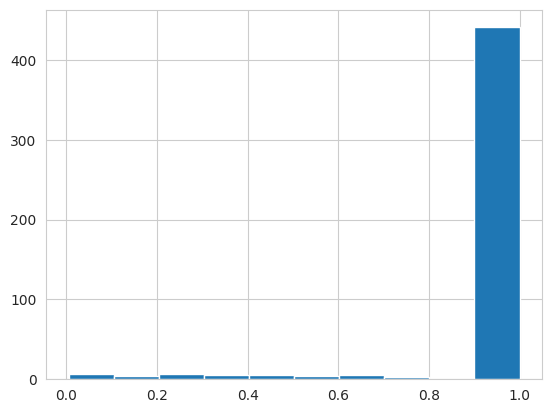

In [40]:
plt.hist(foo[:, 6])

(array([  549.,   444.,   432.,   386.,   401.,   352.,   355.,   309.,
          320., 20964.]),
 array([3.08005761e-04, 1.00277205e-01, 2.00246405e-01, 3.00215604e-01,
        4.00184803e-01, 5.00154003e-01, 6.00123202e-01, 7.00092402e-01,
        8.00061601e-01, 9.00030801e-01, 1.00000000e+00]),
 <BarContainer object of 10 artists>)

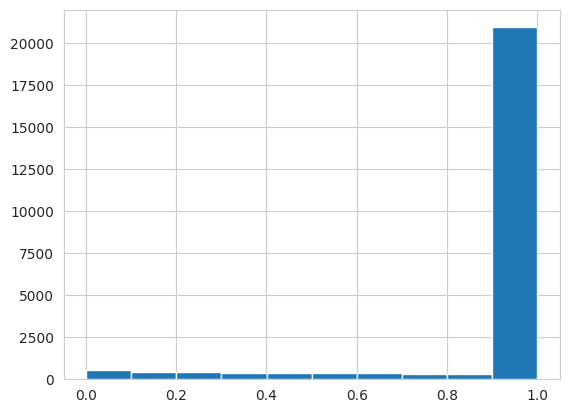

In [41]:
plt.hist(bar[:, 6])

In [13]:
np.mean(bar[:, 6]>= 0.99)

0.38250550015255896

In [14]:
temp = bar[:, 6]
np.mean(temp[temp <0.99])

0.31843203167711387

In [26]:
list(g.iterNeighbors(0))

[11,
 293,
 462,
 635,
 1152,
 1155,
 1309,
 1345,
 1587,
 1733,
 1863,
 1875,
 1989,
 2043,
 2347,
 2474,
 2531,
 2581,
 2814,
 3151,
 3293,
 3323,
 3417,
 3428,
 3469,
 3747,
 3939,
 4212,
 4241,
 4252,
 4271,
 4535,
 4843,
 4884,
 4958]

In [29]:
g.hasEdge(0, 4213)

False

In [19]:
edge_list = generation.upper_triangular_to_edgelist_fastest(edges)
edge_list2 = []
for u, v in edge_list:
    edge_list2.append((u, v, weights[u], weights[v], probs[u, v]))

In [20]:
edge_list2

[(0, 58, 1.4000691436004415, 120.63195640713168, 1.0),
 (0, 100, 1.4000691436004415, 1.2793195974839178, 0.09250307562426816),
 (0, 171, 1.4000691436004415, 4.156664549201526, 0.04355855724681885),
 (0, 177, 1.4000691436004415, 466.4117864582465, 1.0),
 (0, 247, 1.4000691436004415, 49.938740996142286, 0.12473857070211677),
 (0, 267, 1.4000691436004415, 7.89697915851434, 1.0),
 (0, 277, 1.4000691436004415, 3.4162240611435446, 1.0),
 (0, 300, 1.4000691436004415, 1.3449149476427096, 0.006023189814784173),
 (0, 310, 1.4000691436004415, 2.4640190073506454, 0.1074722198019579),
 (0, 318, 1.4000691436004415, 3.2094103356621244, 0.11828794950881787),
 (0, 341, 1.4000691436004415, 2.045023061834384, 1.0),
 (0, 477, 1.4000691436004415, 1.3820038780250765, 0.39664290543438874),
 (0, 509, 1.4000691436004415, 28.129830113371334, 0.2143685684724456),
 (0, 511, 1.4000691436004415, 183.32746877222314, 1.0),
 (0, 574, 1.4000691436004415, 9.93367040966227, 1.0),
 (0, 580, 1.4000691436004415, 96.53740891

In [30]:
8/2

4.0

In [69]:
n**((3-tau)/3)

8.97072157632721

In [75]:
degrees = utils.graph_degrees_to_weights(g)
argsorted = np.argsort(degrees)
argsorted[-8:]

array([  89,  154, 1104,  778, 1446, 1467, 1095, 1033])

In [76]:
g2 = utils.quick_subgraph(g, argsorted[-8:])

In [77]:
nk.overview(g2)

Network Properties:
nodes, edges			8, 28
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				1.000000
clustering coefficient		1.000000
min/max/avg degree		7, 7, 7.000000
degree assortativity		nan
number of connected components	1
size of largest component	8 (100.00 %)


In [15]:
import importlib
importlib.reload(utils)

<module 'benji_girgs.utils' from '../benji_girgs/utils.py'>

In [79]:
utils.avg_degree(g2)

7.0

In [83]:
for k in range(2, 40):
    g2 = utils.get_top_k_clique(g, k)
    avg_degree = utils.avg_degree(g2)
    if avg_degree < k-1:
        print(k)
        break

33


In [82]:
nk.overview(g2)

Network Properties:
nodes, edges			19, 171
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				1.000000
clustering coefficient		1.000000
min/max/avg degree		18, 18, 18.000000
degree assortativity		nan
number of connected components	1
size of largest component	19 (100.00 %)


In [87]:
import os
os.getcwd()
os.environ['DATA_PATH'] = '../../FE_FB_copyweights_cube/'

df = pd.read_csv(os.environ['DATA_PATH'] + '2-features/results.csv')

df.Info = df.Info.apply(lambda temp: {key: eval(var) for key, var in [x.split('=') for x in temp.split('|')]} if (type(temp) is str and '|' in temp) else {
    })
df['alpha'] = df.Info.apply(lambda x: x['alpha'] if 'alpha' in x else 1/float(x['t']) if 't' in x else None)

df.loc[df.Model == '2d-copyweight-cube-girg'].sort_values('Nodes').loc[:,['Graph', 'Model', 'Nodes', 'Info'] ]

'/cluster/home/bdayan/girgs/benji_src/notebooks'

,Graph,Model,Nodes,Info
2,socfb-Caltech36,2d-copyweight-cube-girg,757,"{'tau': 7.3017225936374555, 'alpha': 1.1949215..."
5,socfb-Reed98,2d-copyweight-cube-girg,954,"{'tau': 4.381732472502371, 'alpha': 1.04234527..."
13,socfb-Haverford76,2d-copyweight-cube-girg,1445,"{'tau': 6.5461700448727616, 'alpha': 1.0259698..."
12,socfb-Simmons81,2d-copyweight-cube-girg,1501,"{'tau': 4.739342146243066, 'alpha': 1.13274336..."
17,socfb-Swarthmore42,2d-copyweight-cube-girg,1653,"{'tau': 5.598783007439967, 'alpha': 1.01797359..."
...,...,...,...,...
203,socfb-MSU24,2d-copyweight-cube-girg,32142,"{'tau': 5.112979295133962, 'alpha': 1.11343075..."
211,socfb-UF,2d-copyweight-cube-girg,34887,"{'tau': 4.918454781144023, 'alpha': 1.11343075..."
213,socfb-UF21,2d-copyweight-cube-girg,34908,"{'tau': 4.918454781144023, 'alpha': 1.11819690..."
194,socfb-Texas84,2d-copyweight-cube-girg,36162,"{'tau': 4.774843344808111, 'alpha': 1.07229622..."


In [ ]:
df.iloc[]

In [208]:
df.iloc[13].Info

{'tau': 6.5461700448727616,
 'alpha': 1.0259698621353,
 'const': 0.06818292723176347,
 'target_lcc': 0.3229582156709487,
 'fit_lcc': 0.3183240891192266,
 'fitting_time': 66.06458711624146,
 'hist': [(2.0, 0.5886219593246151),
  (1.342281879194631, 0.4468903490047813),
  (1.1527377521613833, 0.3751120232700809),
  (1.0767160161507403, 0.34511005758833657),
  (1.0423452768729642, 0.33017084213539916),
  (1.0259698621353, 0.321984683191723),
  (1.0340927451930846, 0.3285057575382607),
  (1.0259698621353, 0.321984683191723)]}

In [145]:
import importlib
importlib.reload(generation)

<module 'benji_girgs.generation' from '../benji_girgs/generation.py'>

In [209]:
gd = list(filter(lambda x: x['Name'] == 'socfb-Haverford76', do_feature_extract.graph_dicts))[0]
in_path = gd['FullPath']
in_path
name = gd['Name']
g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
g = utils.get_largest_component(g)
nk.overview(g)


n = g.numberOfNodes()

alpha=1.025
d=2
k=20

'/cluster/scratch/bdayan/GIRG_data/socfb-Haverford76.SpaceOne'

Network Properties:
nodes, edges			1446, 59589
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.057037
clustering coefficient		0.322958
min/max/avg degree		1, 375, 82.419087
degree assortativity		0.068390
number of connected components	1
size of largest component	1446 (100.00 %)


In [216]:
# n = 2500
d=2
tau=2.1
alpha=1.2
# desiredAvgDegree=10.0
e=1.0
k = 10

top_k_edges = []
degrees = utils.graph_degrees_to_weights(g)

for _ in range(5):
    print(_)
    g_girg, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, weights = degrees, points_type=points.PointsTorus2, e=e, desiredAvgDegree=82.4)

    g2 = utils.get_top_k_clique(g_girg, k)
    top_k_edges.append(g2.numberOfEdges())

print(top_k_edges)
print(np.mean(top_k_edges))

e = 0.5

for _ in range(5):
    print(_)
    g_girg, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, weights = degrees, points_type=points.PointsTorus2, e=e, desiredAvgDegree=82.4 * (1/e))

    g2 = utils.get_top_k_clique(g_girg, k)
    top_k_edges.append(g2.numberOfEdges())

print(top_k_edges)
print(np.mean(top_k_edges))



0
1
2
3
4
[21, 25, 29, 22, 27]
24.8
0
1
2
3
4
[21, 25, 29, 22, 27, 21, 18, 25, 25, 23]
23.6


In [211]:
nk.overview(g_girg)

Network Properties:
nodes, edges			1446, 63555
directed?			False
weighted?			False
isolated nodes			5
self-loops			0
density				0.060834
clustering coefficient		0.201152
min/max/avg degree		0, 296, 87.904564
degree assortativity		-0.023502
number of connected components	6
size of largest component	1441 (99.65 %)


In [207]:
g_girg, edges, weights, pts, const = generation.generate_GIRG_nk(n, d, tau, alpha, weights = degrees, desiredAvgDegree=88.3  * 2 , points_type=points.PointsTorus2, e=0.5)
nk.overview(g_girg)

Network Properties:
nodes, edges			3440, 151739
directed?			False
weighted?			False
isolated nodes			29
self-loops			0
density				0.025653
clustering coefficient		0.175749
min/max/avg degree		0, 458, 88.220349
degree assortativity		-0.024257
number of connected components	30
size of largest component	3411 (99.16 %)


In [200]:
nk.overview(g_girg)

Network Properties:
nodes, edges			3440, 151936
directed?			False
weighted?			False
isolated nodes			35
self-loops			0
density				0.025686
clustering coefficient		0.304460
min/max/avg degree		0, 533, 88.334884
degree assortativity		-0.014070
number of connected components	36
size of largest component	3405 (98.98 %)


In [212]:
g2 = utils.get_top_k_clique(g, k)

In [213]:
nk.overview(g2)

Network Properties:
nodes, edges			10, 26
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.577778
clustering coefficient		0.723810
min/max/avg degree		2, 8, 5.200000
degree assortativity		-0.120406
number of connected components	1
size of largest component	10 (100.00 %)


In [179]:
np.random.choice(do_feature_extract.graph_dicts)

{'Group': 'socfb',
 'FullPath': '/cluster/scratch/bdayan/GIRG_data/socfb-Northwestern25.SpaceOne',
 'Name': 'socfb-Northwestern25'}

In [215]:
utils.avg_degree(g)

82.41908713692946

In [214]:
for i in range(10):
    # gd = np.random.choice(do_feature_extract.graph_dicts)
    gd = list(filter(lambda x: x['Name'] == 'socfb-Haverford76', do_feature_extract.graph_dicts))[0]

    in_path = gd['FullPath']
    # in_path
    name = gd['Name']
    g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
    g = utils.get_largest_component(g)


    n = g.numberOfNodes()
    if n > 10000:
        continue


    alpha=1.025
    d=2
    k=10

    degrees = np.array(utils.graph_degrees_to_weights(g))
    argsorted = np.argsort(degrees)
    g_girg, _, _, _, girg_const= generation.generate_GIRG_nk(n, d, tau, alpha, weights=degrees, desiredAvgDegree=utils.avg_degree(g), points_type=points.PointsTorus2)

    edges = []
    for _ in range(10):
        top_k_sample, _, _, _, _ = generation.generate_GIRG_nk(k, d, tau, alpha, weights = degrees[argsorted[-k:]], weights_sum=np.sum(degrees), const=girg_const, points_type=points.PointsCube)
        edges.append(top_k_sample.numberOfEdges())

    print(name)
    nk.overview(g)
    g2 = utils.get_top_k_clique(g, k=k)
    print(f'top {k} in real graph number edges: {g2.numberOfEdges()}')
    print(f'MC sampled in GIRGs avg number edges: {np.mean(edges)}')
    print()


socfb-Haverford76
Network Properties:
nodes, edges			1446, 59589
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.057037
clustering coefficient		0.322958
min/max/avg degree		1, 375, 82.419087
degree assortativity		0.068390
number of connected components	1
size of largest component	1446 (100.00 %)
top 10 in real graph number edges: 26
MC sampled in GIRGs avg number edges: 21.1

socfb-Haverford76
Network Properties:
nodes, edges			1446, 59589
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.057037
clustering coefficient		0.322958
min/max/avg degree		1, 375, 82.419087
degree assortativity		0.068390
number of connected components	1
size of largest component	1446 (100.00 %)
top 10 in real graph number edges: 26
MC sampled in GIRGs avg number edges: 21.1

socfb-Haverford76
Network Properties:
nodes, edges			1446, 59589
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.057037
clustering coeffi

In [218]:
for i in range(10):
    gd = np.random.choice(do_feature_extract.graph_dicts)
    # gd = list(filter(lambda x: x['Name'] == 'socfb-Haverford76', do_feature_extract.graph_dicts))[0]

    in_path = gd['FullPath']
    # in_path
    name = gd['Name']
    g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
    g = utils.get_largest_component(g)


    n = g.numberOfNodes()
    if n > 10000:
        continue


    alpha=1.025
    d=2
    k=10

    degrees = np.array(utils.graph_degrees_to_weights(g))
    argsorted = np.argsort(degrees)
    g_girg, _, _, _, girg_const= generation.generate_GIRG_nk(n, d, tau, alpha, weights=degrees, desiredAvgDegree=utils.avg_degree(g), points_type=points.PointsTorus2)

    edges = []
    for _ in range(10):
        top_k_sample, _, _, _, _ = generation.generate_GIRG_nk(k, d, tau, alpha, weights = degrees[argsorted[-k:]], weights_sum=np.sum(degrees), const=girg_const, points_type=points.PointsCube)
        edges.append(top_k_sample.numberOfEdges())

    print(name)
    # nk.overview(g)
    print(g.numberOfNodes())
    g2 = utils.get_top_k_clique(g, k=k)
    print(f'top {k} in real graph number edges: {g2.numberOfEdges()}')
    print(f'MC sampled in GIRGs avg number edges: {np.mean(edges)}')
    print()


socfb-Vassar85
3068
top 10 in real graph number edges: 29
MC sampled in GIRGs avg number edges: 14.8

socfb-WashU32
7730
top 10 in real graph number edges: 19
MC sampled in GIRGs avg number edges: 16.7

socfb-Villanova62
7755
top 10 in real graph number edges: 31
MC sampled in GIRGs avg number edges: 16.4

socfb-Wesleyan43
3591
top 10 in real graph number edges: 15
MC sampled in GIRGs avg number edges: 13.6

socfb-Swarthmore42
1657
top 10 in real graph number edges: 40
MC sampled in GIRGs avg number edges: 25.1

socfb-Duke14
9885
top 10 in real graph number edges: 16
MC sampled in GIRGs avg number edges: 12.1

socfb-Santa74
3578
top 10 in real graph number edges: 25
MC sampled in GIRGs avg number edges: 17.0



In [180]:
utils.avg_degree(g)

88.37383720930232

In [168]:
g2 = utils.get_top_k_clique(g, k=k)
nk.overview(g2)

Network Properties:
nodes, edges			20, 99
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.521053
clustering coefficient		0.637484
min/max/avg degree		2, 16, 9.900000
degree assortativity		0.193241
number of connected components	1
size of largest component	20 (100.00 %)


In [169]:
nk.overview(g)

Network Properties:
nodes, edges			3440, 152003
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.025698
clustering coefficient		0.276976
min/max/avg degree		1, 674, 88.373837
degree assortativity		0.055527
number of connected components	1
size of largest component	3440 (100.00 %)


In [172]:
degrees = np.array(utils.graph_degrees_to_weights(g))
argsorted = np.argsort(degrees)
g_girg, _, _, _, girg_const= generation.generate_GIRG_nk(n, d, tau, alpha, weights=degrees, desiredAvgDegree=110, points_type=points.PointsCube)

In [173]:
nk.overview(g_girg)

Network Properties:
nodes, edges			3440, 154245
directed?			False
weighted?			False
isolated nodes			9
self-loops			0
density				0.026077
clustering coefficient		0.281703
min/max/avg degree		0, 404, 89.677326
degree assortativity		0.024095
number of connected components	10
size of largest component	3431 (99.74 %)


In [174]:
g_girg_k = utils.get_top_k_clique(g_girg, k)
nk.overview(g_girg_k)

Network Properties:
nodes, edges			20, 79
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.415789
clustering coefficient		0.579163
min/max/avg degree		3, 11, 7.900000
degree assortativity		0.153568
number of connected components	1
size of largest component	20 (100.00 %)


In [176]:
edges = []
for _ in range(10):
    top_k_sample, _, _, _, _ = generation.generate_GIRG_nk(k, d, tau, alpha, weights = degrees[argsorted[-k:]], weights_sum=np.sum(degrees), const=girg_const, points_type=points.PointsCube)
    edges.append(top_k_sample.numberOfEdges())

In [178]:
print(edges)
print(np.mean(edges))

[90, 81, 82, 81, 96, 87, 76, 88, 77, 90]
84.8


In [127]:
nk.overview(top_k_sample)

Network Properties:
nodes, edges			10, 45
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				1.000000
clustering coefficient		1.000000
min/max/avg degree		9, 9, 9.000000
degree assortativity		nan
number of connected components	1
size of largest component	10 (100.00 %)


In [121]:
degrees[argsorted[-10:]]

array([331., 335., 338., 346., 352., 361., 371., 456., 467., 467.])

In [ ]:
n = g.numberOfNodes()
alpha = 1.5
c = 0.2


In [12]:
ws = utils.graph_degrees_to_weights(g)
sorted_ws = sorted(ws)
tot = np.sum(ws)

In [14]:
for k in range(2, 20):
    a, b = sorted_ws[-k], sorted_ws[-k + 1]
    print(k)
    print(a, b)
    print(a*b/tot)

2
467.0 467.0
1.198897244761088
3
456.0 467.0
1.1706576950986214
4
371.0 456.0
0.9300085757635728
5
361.0 371.0
0.7362567891461618
6
352.0 361.0
0.6985509158475713
7
346.0 352.0
0.669525254524265
8
338.0 346.0
0.6428964091738681
9
335.0 338.0
0.62245750599204
10
331.0 335.0
0.6095663742111397
11
325.0 331.0
0.5913703630406579
12
322.0 325.0
0.5752908063416672
13
320.0 322.0
0.5664401785517954
14
313.0 320.0
0.5506079996481738
15
312.0 313.0
0.5368427996569695
16
312.0 312.0
0.5351276469424104
17
311.0 312.0
0.5334124942278514
18
310.0 311.0
0.5299931833674165
19
305.0 310.0
0.5197682344921609


In [16]:
outs = utils.empirical_graph_top_k(g)

In [17]:
outs

[(2, 467.0, 467.0, 1.198897244761088),
 (3, 456.0, 467.0, 1.1706576950986214),
 (4, 371.0, 456.0, 0.9300085757635728),
 (5, 361.0, 371.0, 0.7362567891461618),
 (6, 352.0, 361.0, 0.6985509158475713),
 (7, 346.0, 352.0, 0.669525254524265),
 (8, 338.0, 346.0, 0.6428964091738681),
 (9, 335.0, 338.0, 0.62245750599204),
 (10, 331.0, 335.0, 0.6095663742111397),
 (11, 325.0, 331.0, 0.5913703630406579),
 (12, 322.0, 325.0, 0.5752908063416672),
 (13, 320.0, 322.0, 0.5664401785517954),
 (14, 313.0, 320.0, 0.5506079996481738),
 (15, 312.0, 313.0, 0.5368427996569695),
 (16, 312.0, 312.0, 0.5351276469424104),
 (17, 311.0, 312.0, 0.5334124942278514),
 (18, 310.0, 311.0, 0.5299931833674165),
 (19, 305.0, 310.0, 0.5197682344921609)]

In [26]:
df_mini = df.loc[df.Model == '1d-copyweight-cube-girg'].sort_values('Nodes')

outs = []
for i in range(-1, -10, -1):
    gd = list(filter(lambda x: x['Name'] == df_mini.iloc[i].Graph, do_feature_extract.graph_dicts))[0]
    in_path = gd['FullPath']
    in_path
    name = gd['Name']
    g = networkit.readGraph(in_path, networkit.Format.EdgeListSpaceOne)
    g = utils.get_largest_component(g)
    nk.overview(g)
    n = g.numberOfNodes()
    k_things = utils.empirical_graph_top_k(g)
    outs.append((name, n, k_things))

'/cluster/scratch/bdayan/GIRG_data/socfb-Penn94.SpaceOne'

Network Properties:
nodes, edges			41536, 1362220
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.001579
clustering coefficient		0.211836
min/max/avg degree		1, 4410, 65.592257
degree assortativity		-0.001198
number of connected components	1
size of largest component	41536 (100.00 %)


'/cluster/scratch/bdayan/GIRG_data/socfb-Texas84.SpaceOne'

Network Properties:
nodes, edges			36364, 1590651
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.002406
clustering coefficient		0.193727
min/max/avg degree		1, 6312, 87.484930
degree assortativity		-0.001452
number of connected components	1
size of largest component	36364 (100.00 %)


'/cluster/scratch/bdayan/GIRG_data/socfb-UF21.SpaceOne'

Network Properties:
nodes, edges			35111, 1465654
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.002378
clustering coefficient		0.221154
min/max/avg degree		1, 8246, 83.486884
degree assortativity		-0.009827
number of connected components	1
size of largest component	35111 (100.00 %)


'/cluster/scratch/bdayan/GIRG_data/socfb-UF.SpaceOne'

Network Properties:
nodes, edges			35111, 1465654
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.002378
clustering coefficient		0.221154
min/max/avg degree		1, 8246, 83.486884
degree assortativity		-0.009827
number of connected components	1
size of largest component	35111 (100.00 %)


'/cluster/scratch/bdayan/GIRG_data/socfb-MSU24.SpaceOne'

Network Properties:
nodes, edges			32361, 1118767
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.002137
clustering coefficient		0.204241
min/max/avg degree		1, 5267, 69.142919
degree assortativity		0.009708
number of connected components	1
size of largest component	32361 (100.00 %)


'/cluster/scratch/bdayan/GIRG_data/socfb-Texas80.SpaceOne'

Network Properties:
nodes, edges			31538, 1219639
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.002452
clustering coefficient		0.216780
min/max/avg degree		1, 1796, 77.344093
degree assortativity		0.164652
number of connected components	1
size of largest component	31538 (100.00 %)


'/cluster/scratch/bdayan/GIRG_data/socfb-UIllinois20.SpaceOne'

Network Properties:
nodes, edges			30795, 1264421
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.002667
clustering coefficient		0.214819
min/max/avg degree		1, 4632, 82.118591
degree assortativity		0.028971
number of connected components	1
size of largest component	30795 (100.00 %)


'/cluster/scratch/bdayan/GIRG_data/socfb-UIllinois.SpaceOne'

Network Properties:
nodes, edges			30795, 1264421
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.002667
clustering coefficient		0.214819
min/max/avg degree		1, 4632, 82.118591
degree assortativity		0.028971
number of connected components	1
size of largest component	30795 (100.00 %)


'/cluster/scratch/bdayan/GIRG_data/socfb-Michigan23.SpaceOne'

Network Properties:
nodes, edges			30106, 1176489
directed?			False
weighted?			False
isolated nodes			0
self-loops			0
density				0.002596
clustering coefficient		0.209972
min/max/avg degree		1, 2031, 78.156447
degree assortativity		0.115535
number of connected components	1
size of largest component	30106 (100.00 %)


In [27]:
outs[-1]

('socfb-Michigan23',
 30106,
 [(2, 1621.0, 2031.0, 1.399184777758228),
  (3, 1492.0, 1621.0, 1.027860013990781),
  (4, 1192.0, 1492.0, 0.7558353711764411),
  (5, 1147.0, 1192.0, 0.5810611063936849),
  (6, 1119.0, 1147.0, 0.5454759883007831),
  (7, 1076.0, 1119.0, 0.5117106917276745),
  (8, 917.0, 1076.0, 0.4193375373675402),
  (9, 866.0, 917.0, 0.337496568178708),
  (10, 842.0, 866.0, 0.30989325017063485),
  (11, 825.0, 842.0, 0.2952216297814939),
  (12, 825.0, 825.0, 0.2892610980638153),
  (13, 820.0, 825.0, 0.2875080004997922),
  (14, 774.0, 820.0, 0.2697347786507141),
  (15, 730.0, 774.0, 0.24012974196953818),
  (16, 708.0, 730.0, 0.2196535624217481),
  (17, 706.0, 708.0, 0.2124320754380194),
  (18, 704.0, 706.0, 0.21123189422085545),
  (19, 688.0, 704.0, 0.20584637850417642)])

In [28]:
outs[-2]

('socfb-UIllinois',
 30795,
 [(2, 1487.0, 4632.0, 2.723690922564557),
  (3, 1446.0, 1487.0, 0.8502713890389356),
  (4, 1088.0, 1446.0, 0.6221219040177283),
  (5, 1083.0, 1088.0, 0.4659460733410786),
  (6, 1007.0, 1083.0, 0.43125707339564906),
  (7, 930.0, 1007.0, 0.37033155887161),
  (8, 929.0, 930.0, 0.341646492742528),
  (9, 869.0, 929.0, 0.31923742171317937),
  (10, 851.0, 869.0, 0.29243384916890813),
  (11, 841.0, 851.0, 0.28301135460420224),
  (12, 833.0, 841.0, 0.2770252154938901),
  (13, 772.0, 833.0, 0.25429663063172786),
  (14, 766.0, 772.0, 0.23384300007671496),
  (15, 686.0, 766.0, 0.20779313219252132),
  (16, 685.0, 686.0, 0.18582022917999622),
  (17, 630.0, 685.0, 0.17065123087958836),
  (18, 612.0, 630.0, 0.15246504131139865),
  (19, 610.0, 612.0, 0.14762488126976694)])

In [21]:
outs[-1]

('socfb-Wesleyan43',
 3591,
 [(2, 397.0, 549.0, 0.789490270513062),
  (3, 382.0, 397.0, 0.549335670921657),
  (4, 371.0, 382.0, 0.5133590274859817),
  (5, 364.0, 371.0, 0.4891693350913543),
  (6, 362.0, 364.0, 0.47730269353927296),
  (7, 335.0, 362.0, 0.4392758305924627),
  (8, 332.0, 335.0, 0.40287175623397137),
  (9, 327.0, 332.0, 0.3932509381746526),
  (10, 326.0, 327.0, 0.38614399350884565),
  (11, 316.0, 326.0, 0.37315444021038296),
  (12, 315.0, 316.0, 0.3605633394670878),
  (13, 311.0, 315.0, 0.3548582233362795),
  (14, 302.0, 311.0, 0.34021328078589336),
  (15, 298.0, 302.0, 0.3259921468623672),
  (16, 294.0, 298.0, 0.31735659330309923),
  (17, 291.0, 294.0, 0.30990190822550967),
  (18, 283.0, 291.0, 0.29830693887013343),
  (19, 282.0, 283.0, 0.28908095107002624)])